# Toxic and non-Toxic(edible) Mushroom Classifier

**In this project a calssification model built according to a dataset of Mushroom types and shapes, this model use the geometry and shape data of mushrroms then detect if a mushroom is Toxic or non-toxic**.

## Dataset Parameters

0. **cap-shape :** 0 = bell, 1 = conical, 2 = convex, 3 = flat, 4 = knobbed, 5 = sunken
1. **cap-surface :** 0 = fibrous, 1 = grooves, 2 = scaly, 3 = smooth
2. **cap-color :** 0 = brown, 1 = buff, 2 = cinnamon, 3 = gray, 4 = green, 5 = pink, 6 = purple, 7 = red, 8 = white, 9 = yellow
3. **bruises? :** 0 = bruises, 1 = no
4. **odor :**0 = almond, 1 = anise, 2 = creosote, 8 = fishy, 4 = foul, 5 = musty, 6 = none, 7 = pungent, 3 = spicy
5. **gill-attachment :** 0 = attached, 1 = free
6. **gill-spacing :** 0 = close, 1 = crowded
7. **gill-size :** 0 = broad, 1 = narrow
8. **gill-color :** 0 = black, 1 = brown, 2 = buff, 3 = chocolate, 4 = gray, 5 = green, 6 = orange, 7 = pink, 8 = purple, 9 = red, 10 = white, 11 = yellow
9. **stalk-shape :** 0 = enlarging, 1 = tapering
10. **stalk-root :** 1 = bulbous, 2 = club, 3 = equal, 4 = rooted, 0 = missing
11. **stalk-surface-above-ring :** 0 = fibrous, 1 = scaly, 2 = silky, 3 = smooth
12. **stalk-surface-below-ring :** 0 = fibrous, 1 = scaly, 2 = silky, 3 = smooth
13. **stalk-color-above-ring :** 0 = brown, 1 = buff, 2 = cinnamon, 3 = gray, 4 = orange, 5 = pink, 6 = red, 7 = white, 8 = yellow
14. **stalk-color-below-ring :** 0 = brown, 1 = buff, 2 = cinnamon, 3 = gray, 4 = orange, 5 = pink, 6 = red, 7 = white, 8 = yellow
15. **veil-type :** 0 = partial, 1 = universal
16. **veil-color :** 0 = brown, 1 = orange, 2 = white, 3 = yellow
17. **ring-number :** 0 = none, 1 = one, 2 = two
18. **ring-type :** 0 = evanescent, 1 = flaring, 2 = large, 3 = none, 4 = pendant
19. **spore-print-color :** 0 = black, 1 = brown, 2 = buff, 3 = chocolate, 4 = green, 5 = orange, 6 = purple, 7 = white, 8 = yellow
20. **population :** 0 = abundant, 1 = clustered, 2 = numerous, 3 = scattered, 4 = several, 5 = solitary
21. **habitat :** 0 = grasses, 1 = leaves, 2 = meadows, 3 = paths, 4 = urban, 5 = waste, 6 = woods
22. **target :** 1 = poisonous(Toxic), 0 = edible(non-Toxic)

### Checking for missing valuses and mismatches: 

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_table('mushroom.tsv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises?                  8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

In [33]:
df.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,2,0,7,0,6,1,0,0,8,1,1,3,3,3,5,0,2,1,4,1,4,6,0
1,0,3,9,0,0,1,0,0,4,0,2,3,3,7,7,0,2,1,4,0,2,0,0
2,2,3,8,1,6,1,1,0,0,1,3,0,3,7,7,0,2,1,0,0,3,0,0
3,2,2,3,1,4,1,0,0,4,0,1,2,2,0,5,0,2,1,2,3,4,3,1
4,3,0,0,0,6,1,0,0,8,1,1,3,3,7,5,0,2,1,4,0,5,6,0


In [34]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,2.491876,1.742984,4.323486,0.584441,4.788282,0.974151,0.161497,0.309207,4.729444,0.567208,1.109798,2.498277,2.424914,5.446578,5.393402,0.0,1.965534,1.069424,2.291974,3.062038,3.644018,3.221073,0.482029
std,0.901287,1.179629,3.444391,0.492848,1.983678,0.158695,0.368011,0.462195,3.342402,0.495493,1.061106,0.814658,0.870347,2.143900,2.194604,0.0,0.242669,0.271064,1.801672,2.825308,1.252082,2.530692,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,3.000000,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000,0.000000
75%,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,3.000000,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


it seems that everything is well prepared. 

<br>

## Building Classification model 

In [99]:
# splitting dataset to train and test datasets  : 
from sklearn.model_selection import train_test_split
y=df.target.values
x=df.drop(['target'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

### Knn classification 

In [100]:
from sklearn.neighbors import KNeighborsClassifier

Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(x_train,y_train)
knn_pred = Knn.predict(x_test)
knn_score=Knn.score(x_test,y_test)
print(knn_score)

1.0


#### Generating Knn Neeighbour count tester

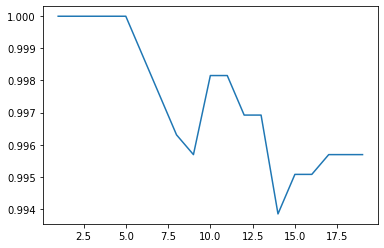

In [101]:
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,20),score_list)
plt.xlabel="n neighbours count"
plt.ylabel="Model Score"
plt.show()


**As we can see in the Figure above, n_neighbours count between 1 and 5 will give a result with High Accuracy**

<br>

### SVM Classification 

In [102]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
SV_pred= svm.predict(x_test)

SV_score=svm.score(x_test,y_test)
print("The SVM model Score is : ",SV_score)


The SVM model Score is :  0.9981538461538462


<br>

### Decision Tree 

In [103]:
from sklearn.tree import DecisionTreeClassifier # NOTE! that is Desicsion tree Regressor is defferent than Classifier

myTree=DecisionTreeClassifier(random_state=1)
myTree.fit(x_train,y_train)

TreeScore = myTree.score(x_test,y_test)
print('myTree score is : ',TreeScore)


myTree score is :  1.0


<br>

### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

myForest=RandomForestClassifier(n_estimators=150, random_state=1)
myForest.fit(x_train,y_train)

ForestScore = myForest.score(x_test,y_test)
print("myForest Score is : ",ForestScore)


myForest Score is :  1.0


<br>

## Evaluation of Classification models 

In [105]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# for Knn : 
Knn_pred=Knn.predict(x_test)
print("=========== Knn Scores ============")
print("Knn R2 Score is : ", r2_score(y_test,Knn_pred))
print("Knn Mean Absolute Error Score is :",mean_absolute_error(y_test,Knn_pred))
print("Knn Mean Squared Error Score is : ",mean_squared_error(y_test,Knn_pred))
print("===================================")
print("\n")

# for SVM : 
SV_pred=svm.predict(x_test)
print("=========== SVM Scores ============")
print("Knn R2 Score is : ", r2_score(y_test,SV_pred))
print("Knn Mean Absolute Error Score is :",mean_absolute_error(y_test,SV_pred))
print("Knn Mean Squared Error Score is : ",mean_squared_error(y_test,SV_pred))
print("===================================")
print("\n")

# for Decision tree :
myTree_pred = myTree.predict(x_test)
print("=========== Tree Scores ============")
print("Knn R2 Score is : ", r2_score(y_test,myTree_pred))
print("Knn Mean Absolute Error Score is :",mean_absolute_error(y_test,myTree_pred))
print("Knn Mean Squared Error Score is : ",mean_squared_error(y_test,myTree_pred))
print("====================================")
print("\n")

# for the Random Forest : 
myForest_pred = myForest.predict(x_test)
print("=========== Knn Scores ============")
print("Knn R2 Score is : ", r2_score(y_test,myForest_pred))
print("Knn Mean Absolute Error Score is :",mean_absolute_error(y_test,myForest_pred))
print("Knn Mean Squared Error Score is : ",mean_squared_error(y_test,myForest_pred))
print("===================================")
print("\n")

=========== Knn Scores ============
Knn R2 Score is :  1.0
Knn Mean Absolute Error Score is : 0.0
Knn Mean Squared Error Score is :  0.0


=========== SVM Scores ============
Knn R2 Score is :  0.9925960688542815
Knn Mean Absolute Error Score is : 0.0018461538461538461
Knn Mean Squared Error Score is :  0.0018461538461538461


=========== Tree Scores ============
Knn R2 Score is :  1.0
Knn Mean Absolute Error Score is : 0.0
Knn Mean Squared Error Score is :  0.0


=========== Knn Scores ============
Knn R2 Score is :  1.0
Knn Mean Absolute Error Score is : 0.0
Knn Mean Squared Error Score is :  0.0




## Descussion

finally after training a multple classification models based on "mushroom" dataset, it gave an accuracy level between 99 to 100 % , it is strange! , but when I made sure about the code, everything was ok. 